In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("D://Cognifyz Internship//Internship task Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.shape

(9551, 21)

In [4]:
data.dtypes  # checking the data types

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## Data cleaning process 

In [5]:
data.isnull().sum()  #Checking null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### For this model only consider Cuisines, has Table booking, Has Online delievery, Price range, Aggregate rating, Average cost for two and Votes

In [7]:
# Deleting unnecessary columns

df1 = data.drop(['Restaurant ID','Country Code','Longitude','Latitude','Currency','Is delivering now',
                'Switch to order menu','Rating color','Rating text'],axis=1)

In [8]:
df1.head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Yes,No,3,4.8,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Yes,No,3,4.5,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,270
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,No,No,4,4.9,365
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Yes,No,4,4.8,229


In [9]:
df1.shape

(9542, 12)

In [10]:
# Assuming your DataFrame is named df1 and the column is 'Cuisines'
cuisines_with_special_character = df1[df1['Cuisines'].str.contains('�')]

# Print the names of cuisines with the special character
print("Cuisines names containing '�':")
print(cuisines_with_special_character['Cuisines'])

Cuisines_symbol_count = df1['Cuisines'].str.count('�').sum()

print("Count of Cuisines containing '�':", Cuisines_symbol_count)

Cuisines names containing '�':
9530    Kebab, Turkish Pizza, D�_ner
9544                Desserts, B�_rek
Name: Cuisines, dtype: object
Count of Cuisines containing '�': 2


In [11]:
# Assuming your DataFrame is named df and the column is 'Cuisines'
df1['Cuisines'] = df1['Cuisines'].str.replace('�', '')

# Find and print the names of restaurants with the special character
cuisines_special_char_after_replace = df1[df1['Cuisines'].str.contains('�')]

# Print the names of restaurants after replacement
print("Cuisines names containing '�' after replacement:")
print(cuisines_special_char_after_replace['Cuisines'])

Cuisines names containing '�' after replacement:
Series([], Name: Cuisines, dtype: object)


In [12]:
df1['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

### Price range 

In [13]:
df1['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [14]:
# Count occurrences of each value
price_range_counts = df1['Price range'].value_counts()

# Print the result
print(price_range_counts)

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64


### Average Cost for Two 

In [15]:
df1['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

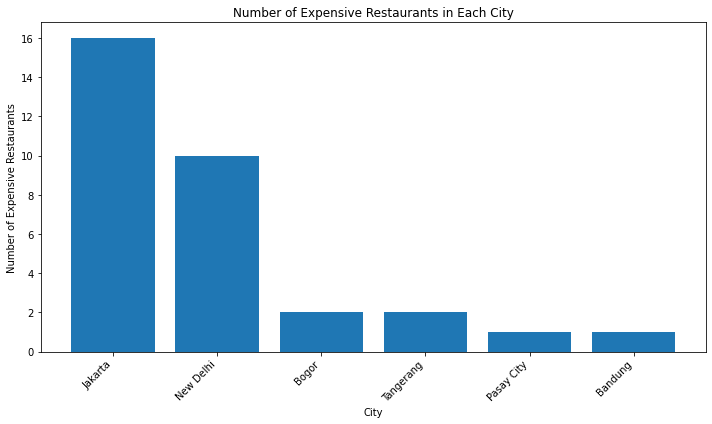

In [16]:
# Filter rows where 'Average Cost for two' is greater than 5000
expensive_restaurants = df1[df1['Average Cost for two'] > 5000]

# Print selected columns
# print(expensive_restaurants[['City', 'Address', 'Locality Verbose', 'Average Cost for two']])

# Count the number of expensive restaurants in each city
city_counts = expensive_restaurants['City'].value_counts()

# Convert the result to a DataFrame
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City', 'Count']

# Plot a bar plot
plt.figure(figsize=(10, 6))
plt.bar(city_counts_df['City'], city_counts_df['Count'])
plt.title('Number of Expensive Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Expensive Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

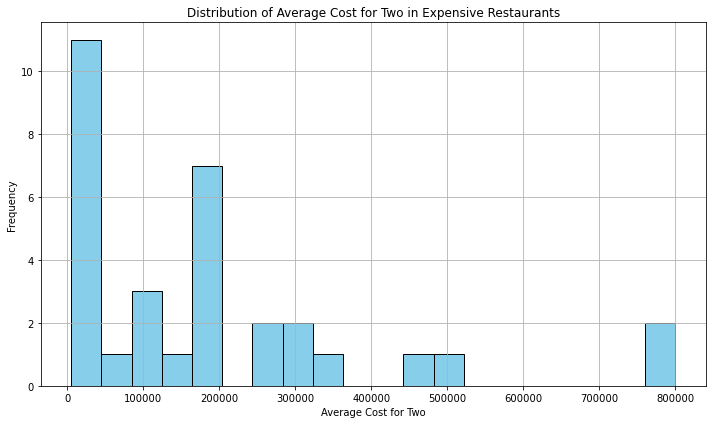

In [17]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(expensive_restaurants['Average Cost for two'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Cost for Two in Expensive Restaurants')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Count occurrences of each value
AverageCost_counts = df1['Average Cost for two'].value_counts()

# Print the result
print(AverageCost_counts[0:20])
print(AverageCost_counts[20:40])
print(AverageCost_counts[40:60])
print(AverageCost_counts[60:80])
print(AverageCost_counts[80:100])
print(AverageCost_counts[100:140])
len(df1['Average Cost for two'])

500     900
300     897
400     857
200     687
600     652
250     461
350     457
700     403
150     367
100     353
800     347
450     335
1000    281
1500    190
550     183
650     177
25      174
1200    145
10      125
40      112
Name: Average Cost for two, dtype: int64
2000    110
900     109
1100     80
1400     78
1600     78
1300     68
750      68
1800     68
50       55
850      55
2500     54
3000     41
70       35
1700     31
2200     27
20       25
30       24
950      21
60       19
80       19
Name: Average Cost for two, dtype: int64
35        17
120       17
1250      17
1900      16
0         15
90        14
4000      13
4500      13
3500      13
5000      12
45        12
55        10
2100      10
2400       8
1350       8
1650       8
200000     6
160        6
230        6
1550       6
Name: Average Cost for two, dtype: int64
3200    5
6000    5
170     5
110     5
15      4
7       4
3600    3
320     3
85      3
75      3
65      3
1850    3
270     3
1750   

9542

In [19]:
# Assuming df is your DataFrame
descriptive_stats = df1['Average Cost for two'].describe()
print(descriptive_stats)

count      9542.000000
mean       1200.326137
std       16128.743876
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64


### Has Table Booking 

In [20]:
TableBooking_counts = df1['Has Table booking'].str.lower().value_counts()

# Display the counts
print("Count of 'No':", TableBooking_counts.loc['no'])
print("Count of 'Yes':", TableBooking_counts.loc['yes'])

Count of 'No': 8384
Count of 'Yes': 1158


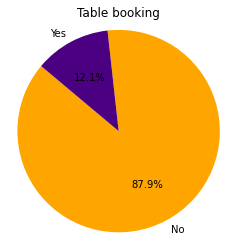

In [21]:
# Whether restaurant offer table booking or not

x = df1['Has Table booking'].value_counts()

# Step 2: Create a pie chart
colors = ['orange', 'indigo']
plt.figure(figsize=(4, 4))
plt.pie(x, labels=x.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Table booking')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

###  Has Online delivery

In [22]:
OnlineDelivery_counts = df1['Has Online delivery'].str.lower().value_counts()

# Display the counts
print("Count of 'No':", OnlineDelivery_counts.loc['no'])
print("Count of 'Yes':", OnlineDelivery_counts.loc['yes'])

Count of 'No': 7091
Count of 'Yes': 2451


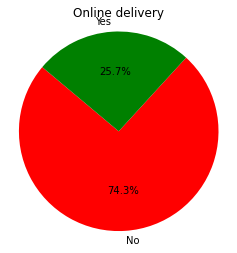

In [23]:
x = df1['Has Online delivery'].value_counts()

# Step 2: Create a pie chart
colors = ['red', 'green']
plt.figure(figsize=(4, 4))
plt.pie(x, labels=x.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Online delivery')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

###  Aggregate rating

<Figure size 648x504 with 0 Axes>

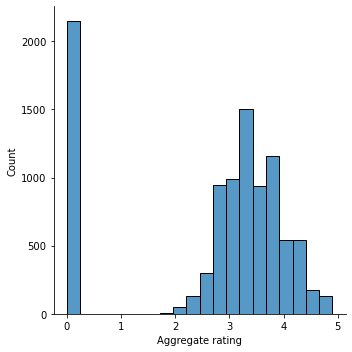

In [24]:
# Aggregate rating

plt.figure(figsize=(9,7))

sns.displot(df1['Aggregate rating'], bins=20)

In [25]:
print("Aggregate_rating_min:",df1['Aggregate rating'].min())

print("Aggregate_rating_max:",df1['Aggregate rating'].max())

df1['Aggregate rating']=df1['Aggregate rating'].astype(float)

print("Aggregate_rating_betn1to2:",((df1['Aggregate rating']>=1) & (df1['Aggregate rating']<2)).sum())

print("Aggregate_rating_betn2to3:",((df1['Aggregate rating']>=2) & (df1['Aggregate rating']<3)).sum())

print("Aggregate_rating_betn3to4:",((df1['Aggregate rating']>=3) & (df1['Aggregate rating']<4)).sum())

print("Aggregate_rating_above4:",(df1['Aggregate rating']>=4).sum())

print("Aggregate_rating_equalto0:",(df1['Aggregate rating']==0).sum())

print("TotalLengthOf_Aggregate_rating:",len(df1['Aggregate rating']))

Aggregate_rating_min: 0.0
Aggregate_rating_max: 4.9
Aggregate_rating_betn1to2: 3
Aggregate_rating_betn2to3: 1430
Aggregate_rating_betn3to4: 4583
Aggregate_rating_above4: 1378
Aggregate_rating_equalto0: 2148
TotalLengthOf_Aggregate_rating: 9542


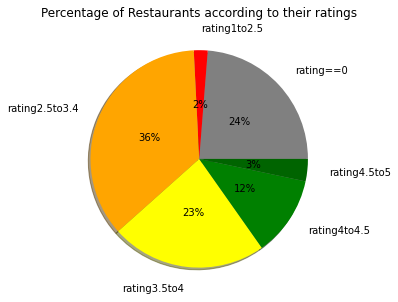

In [26]:
# Plotting the counts with the help of pie chart

slices = [(df1['Aggregate rating']==0).sum(), #color-gray
          ((df1['Aggregate rating']>=1) & (df1['Aggregate rating']<2.5)).sum(), #color-red
          ((df1['Aggregate rating']>=2.5) & (df1['Aggregate rating']<3.4)).sum(), #color-orange
          ((df1['Aggregate rating']>=3.5) & (df1['Aggregate rating']<4)).sum(), #color-yellow
          ((df1['Aggregate rating']>=4) & (df1['Aggregate rating']<4.5)).sum(), #color-green
          ((df1['Aggregate rating']>=4.5) & (df1['Aggregate rating']<=5)).sum(), #color-dark green   
         ]

labels = ['rating==0','rating1to2.5','rating2.5to3.4','rating3.5to4','rating4to4.5','rating4.5to5']
colors = ['gray','red','orange','yellow','green','darkgreen'] ##023020
plt.pie(slices, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(5,5)
plt.show()

### Cuisines 

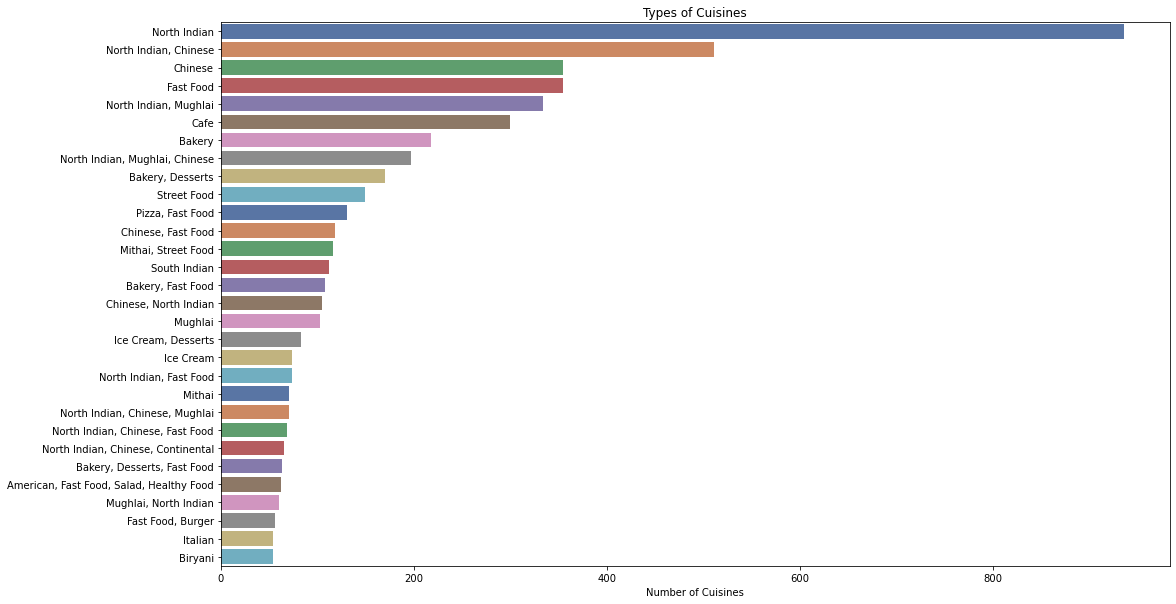

In [27]:
plt.figure(figsize=(17,10))
chains = df1['Cuisines'].value_counts()[:30]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Types of Cuisines")
plt.xlabel("Number of Cuisines")
plt.show()

In [28]:
import re
import pandas as pd

# Assuming 'Cuisines' column contains strings or NaN values
df1['Cuisines'] = df1['Cuisines'].astype(str)

df1.index = range(df1.shape[0])
likes = []

for i in range(df1.shape[0]):
    array_split = re.split(',', df1['Cuisines'][i])
    for item in array_split:
        likes.append(item.strip())  # Add strip() to remove leading/trailing whitespaces

df1.index = range(df1.shape[0])
df1.index

print("Count of Most liked Cuisines")
favourite_food = pd.Series(likes).value_counts()
print(favourite_food.head(20))
print(favourite_food[20:30])
print(favourite_food[30:40])
print(favourite_food[40:50])
print(favourite_food[50:60])
print(favourite_food[60:70])
print(favourite_food[70:80])
print(favourite_food[80:90])
print(favourite_food[90:100])
print(favourite_food[100:])
print("length of favourite_food:",len(favourite_food))

# Create a DataFrame with the top 100 favorite cuisines
top_favourite_food = favourite_food.head(100).reset_index()
top_favourite_food.columns = ['Cuisine', 'Count']

# Save the DataFrame to a CSV file
top_favourite_food.to_csv('D://Cognifyz Internship//top_favourite_food.csv', index=False)

Count of Most liked Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Street Food      562
American         390
Pizza            381
Mithai           380
Burger           251
Thai             234
Asian            233
Beverages        229
Ice Cream        226
Mexican          181
dtype: int64
Biryani          177
Seafood          174
Healthy Food     150
European         148
Japanese         135
Finger Food      114
Raw Meats        114
Mediterranean    112
Salad             93
Sushi             75
dtype: int64
Indian       70
Lebanese     69
Steak        62
Sandwich     53
Tea          48
Tibetan      44
Breakfast    41
Bar Food     39
BBQ          33
French       29
dtype: int64
Juices            29
Bengali           29
Arabian           28
Brazilian         28
Hyderabadi        26
Southern          24
Kerala          

In [ ]:
df1.Cuisines = df1.Cuisines.apply(lambda x: x.strip())
Cuisines_stats = df1.groupby('Cuisines')['Cuisines'].agg('count').sort_values(ascending=False)
Cuisines_stats

In [ ]:
len(Cuisines_stats[Cuisines_stats<=50])

In [ ]:
cuisines_stats_less_than_100 = favourite_food[favourite_food<=100]
cuisines_stats_less_than_100

In [ ]:
len(df1.Cuisines.unique())

In [ ]:
df1.Cuisines = df1.Cuisines.apply(lambda x: 'other' if x in cuisines_stats_less_than_100 else x)
len(df1.Cuisines.unique())

In [29]:
# Count occurrences of each value
locality_counts = df1['Locality'].value_counts()

# Print the result
print(locality_counts[0:20])
print(locality_counts[20:40])
print(locality_counts[40:60])

Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Pitampura               85
Malviya Nagar           85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Krishna Nagar           77
Sector 62               76
Karol Bagh              76
Sector 18               75
Hauz Khas               74
Kalkaji                 73
Sector 15               71
DLF Phase 3             69
Mahipalpur              69
Mukherjee Nagar         68
Name: Locality, dtype: int64
Chandni Chowk                 67
Shalimar Bagh                 67
Greater Kailash (GK) 1        66
Greater Kailash (GK) 2        66
Kamla Nagar                   65
Delhi University-GTB Nagar    65
Paharganj                     64
MG Road                       63
Vasundhara Enclave            62
Jail Road                     61
Tilak Nagar                   61
Sector 72                     61
Palam                         60
Na

###  Restaurant Name

In [30]:
# Count restaurant names containing '��' or any other specified symbols
RestaurantName_symbol_count = df1['Restaurant Name'].str.count('�').sum()

# Display the count
print("Count of restaurant names containing '�':", RestaurantName_symbol_count)

# Assuming your DataFrame is named df1 and the column is 'Restaurant Name'
restaurant_with_special_character = df1[df1['Restaurant Name'].str.contains('�')]

# Print the names of restaurants with the special character
print("Restaurant names containing '�':")
print(restaurant_with_special_character['Restaurant Name'])

Count of restaurant names containing '�': 212
Restaurant names containing '�':
23        Caf�� Daniel Briand
26             Pizza �� Bessa
30             Sandubas Caf��
36                     Tayp��
38                    Manzu��
                ...          
9533           Leman K�_lt�_r
9534             Dem Karak�_y
9535    Karak�_y G�_ll�_o��lu
9538             Ceviz A��ac۱
9540              A���k Kahve
Name: Restaurant Name, Length: 103, dtype: object


In [31]:
# Assuming your DataFrame is named df1 and the column is 'Restaurant Name'
df1['Restaurant Name'] = df1['Restaurant Name'].str.replace('�', '')

# Find and print the names of restaurants with the special character
restaurants_with_special_char_after_replace = df1[df1['Restaurant Name'].str.contains('�')]

# Print the names of restaurants after replacement
print("Restaurant names containing '�' after replacement:")
print(restaurants_with_special_char_after_replace['Restaurant Name'])

Restaurant names containing '�' after replacement:
Series([], Name: Restaurant Name, dtype: object)


In [32]:
df1['Restaurant Name']

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9537                 Naml۱ Gurme
9538                  Ceviz Aac۱
9539                       Huqqa
9540                    Ak Kahve
9541    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9542, dtype: object

In [ ]:
restaurantName_counts = df1['Restaurant Name'].value_counts()

# Display counts
print(restaurantName_counts)

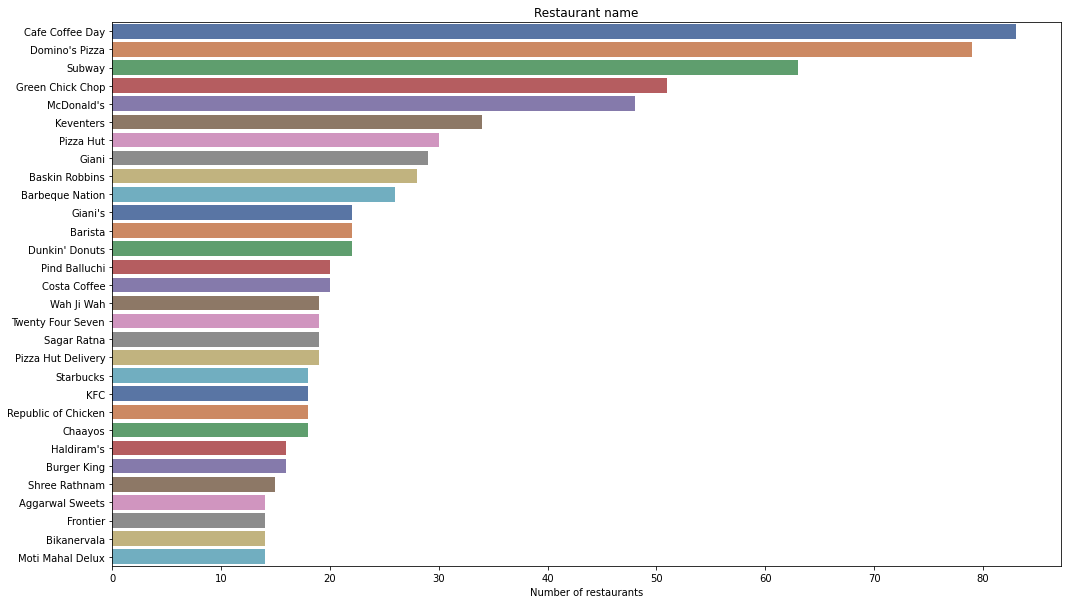

In [33]:
plt.figure(figsize=(17,10))
chains = df1['Restaurant Name'].value_counts()[:30]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Restaurant name")
plt.xlabel("Number of restaurants")
plt.show()

## Preprocessing 

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
df1['Has Table Booking'] = label_encoder.fit_transform(df1['Has Table booking'])
df1['Has Online Delivery'] = label_encoder.fit_transform(df1['Has Online delivery'])

In [35]:
df1.head(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Has Table Booking,Has Online Delivery
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Yes,No,3,4.8,314,1,0
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Yes,No,3,4.5,591,1,0
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,270,1,0
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,No,No,4,4.9,365,0,0
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Yes,No,4,4.8,229,1,0


In [36]:
# Use one-hot encoding for the 'Cuisines' column
cuisines_one_hot = df1['Cuisines'].str.get_dummies(', ')
df = pd.concat([df1, cuisines_one_hot], axis=1)
df

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Yes,No,3,...,0,0,0,0,0,0,0,0,0,0
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Yes,No,3,...,0,0,0,0,0,0,0,0,0,0
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Yes,No,4,...,0,0,0,0,0,0,0,0,0,0
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,No,No,4,...,0,0,0,0,0,0,0,0,0,0
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Yes,No,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,80,No,No,3,...,0,0,0,0,1,0,0,0,0,0
9538,Ceviz Aac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",105,No,No,3,...,0,0,0,0,0,0,0,0,0,1
9539,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",170,No,No,4,...,0,0,0,0,0,0,0,0,0,1
9540,Ak Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,120,No,No,4,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# # Use one-hot encoding for the 'Restaurant Name' column
# restaurants_one_hot = df1['Restaurant Name'].str.get_dummies(', ')
# df = pd.concat([df1, restaurants_one_hot], axis=1)
# df

In [40]:
df1.head(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Has Table Booking,Has Online Delivery
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Yes,No,3,4.8,314,1,0
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Yes,No,3,4.5,591,1,0
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,270,1,0
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,No,No,4,4.9,365,0,0
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Yes,No,4,4.8,229,1,0


In [41]:
df1.shape

(9542, 14)

In [42]:
df2 = df1.drop(['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Has Table booking','Has Online delivery'],axis=1)

In [43]:
df2.head(5)

,Average Cost for two,Price range,Aggregate rating,Votes,Has Table Booking,Has Online Delivery
0,1100,3,4.8,314,1,0
1,1200,3,4.5,591,1,0
2,4000,4,4.4,270,1,0
3,1500,4,4.9,365,0,0
4,1500,4,4.8,229,1,0


In [44]:
X = pd.concat([df2[['Average Cost for two','Price range','Has Table Booking','Has Online Delivery','Votes']],cuisines_one_hot],axis=1)
y = df2['Aggregate rating']

In [45]:
X

,Average Cost for two,Price range,Has Table Booking,Has Online Delivery,Votes,Afghani,African,American,Andhra,Arabian,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,1100,3,1,0,314,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200,3,1,0,591,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4000,4,1,0,270,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,4,0,0,365,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500,4,1,0,229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,80,3,0,0,788,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9538,105,3,0,0,1034,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9539,170,4,0,0,661,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9540,120,4,0,0,901,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X.shape

(9542, 150)

In [48]:
X_columns = X.columns[0:X.columns.get_loc('World Cuisine')+1]
print(list(X_columns))
print("length of X Columns:",len(X_columns))

['Average Cost for two', 'Price range', 'Has Table Booking', 'Has Online Delivery', 'Votes', 'Afghani', 'African', 'American', 'Andhra', 'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion', 'Assamese', 'Australian', 'Awadhi', 'BBQ', 'B_rek', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cajun', 'Canadian', 'Cantonese', 'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese', 'Coffee and Tea', 'Contemporary', 'Continental', 'Cuban', 'Cuisine Varies', 'Curry', 'D_ner', 'Deli', 'Desserts', 'Dim Sum', 'Diner', 'Drinks Only', 'Durban', 'European', 'Fast Food', 'Filipino', 'Finger Food', 'Fish and Chips', 'French', 'Fusion', 'German', 'Goan', 'Gourmet Fast Food', 'Greek', 'Grill', 'Gujarati', 'Hawaiian', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indian', 'Indonesian', 'International', 'Iranian', 'Irish', 'Italian', 'Izgara', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kera

In [49]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9537    4.1
9538    4.2
9539    3.7
9540    4.0
9541    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

## Model Training

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [51]:
# here, we create Linear Regression model.

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.30205024867993413

In [52]:
# here, we used K-Fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

# ShuffleSplit will randomize my samples so that each of the fold have equal distribution of data samples.
# So, it's not just targeted into one area.

array([0.29037502, 0.3150558 , 0.32734791, 0.31310774, 0.3026131 ])

In [ ]:
# we used gris search cv

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridserachcv(X,y):
    algos = {
        'linear-regression': {
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model', 'best_score','best_params'])

find_best_model_using_gridserachcv(X,y)

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
# Perform cross-validation to evaluate the model
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring=mse_scorer)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Average MSE: {cv_scores.mean()}")

Cross-Validation Scores:
[0.09964751 0.11002419 0.10092961 0.10670439 0.10312897]
Average MSE: 0.1040869322202157


In [56]:
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'r2 score: {r2_score}')

Mean Squared Error on Test Set: 0.10476875288105769
r2 score: 0.9532719217115595


In [73]:
# Extract the unique cuisines from the training data
unique_cuisines = X.columns[5:]

# Initialize the new restaurant Dataframe
new_restaurant_cuisines = pd.DataFrame({
    'Average Cost for two': [500],
    'Price range': [2],
    'Has Table Booking': [0],
    'Has Online Delivery': [0],
    'Votes': [878],
    **{cuisine: [0] for cuisine in unique_cuisines}
})

new_restaurant_cuisines['Street Food'] = 1
# new_restaurant_cuisines['Bakery'] = 1   # Another cuisine
# new_restaurant_cuisines['American'] = 1    # Another cuisine
# new_restaurant_cuisines['Italian'] = 1


In [74]:
predicted_rating = model.predict(new_restaurant_cuisines)
result = round(predicted_rating[0],1)
print(f'Predicted Aggregate Rating for the new restaurant: {result}')

Predicted Aggregate Rating for the new restaurant: 3.9


In [ ]:
feature_name = 'Afghani'

# Get the index of the feature in X.columns
index_of_feature = X.columns.get_loc(feature_name)

index_of_feature

In [ ]:
X_train

In [ ]:
cuisines_columns = X_train.columns[0:X_train.columns.get_loc('World Cuisine')+1]
print(list(cuisines_columns))
print(len(cuisines_columns))

In [ ]:
# Ensure that the order of cuisine columns matches the training data
cuisine_columns_train = X_train.columns[0:X_train.columns.get_loc('World Cuisine')+1]

# Assuming X is the DataFrame for prediction
# Ensure that the order of cuisine columns matches the training data
cuisine_columns_predict = X.columns[0:X.columns.get_loc('World Cuisine')+1]

# Check if cuisine column names match
if list(cuisine_columns_train) != list(cuisine_columns_predict):
    print("Cuisine column names do not match. Please check.")
else:
    # Perform prediction using the model
    predicted_rating = model.predict(X)
    print(f'Predicted Aggregate Rating for the new data: {predicted_rating[0]}')

## Use pickle to save our model

In [59]:
import pickle

pickle.dump(model, open('D://Cognifyz Internship//model140224.pkl','wb'))
RF_model = pickle.load(open('D://Cognifyz Internship//model140224.pkl','rb'))

In [60]:
import pickle

# Load the contents of the pickle file
with open("D://Cognifyz Internship//model140224.pkl", "rb") as f:
    model_contents = pickle.load(f)

# Print the contents
print(model_contents)

RandomForestRegressor(random_state=42)


In [ ]:
model_contents